In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Load Digits dataset

In [2]:
digits = datasets.load_digits()

In [3]:
images = digits.images

In [4]:
images.shape

(1797, 8, 8)

In [5]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [6]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

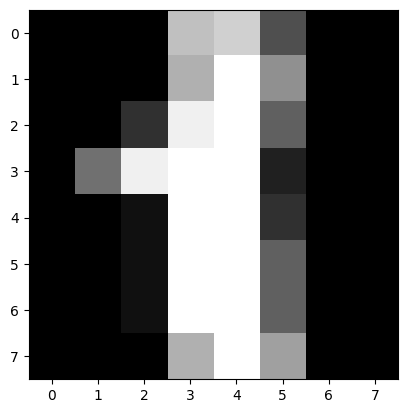

In [7]:
plt.imshow(images[1], cmap='gray')
plt.show()

In [8]:
images[1].reshape(-1).shape

(64,)

In [9]:
digits.data.shape

(1797, 64)

In [10]:
print(f'min : {digits.data.min()}')
print(f'max :{digits.data.max()}')

min : 0.0
max :16.0


In [11]:
X = digits.data / 16

In [12]:
print(f'min : {X.min()}')
print(f'max :{X.max()}')

min : 0.0
max :1.0


In [13]:
y = digits.target

In [14]:
X.shape

(1797, 64)

In [15]:
y.shape

(1797,)

# fit KNN with Train data

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [32]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3)

In [33]:
model = KNeighborsClassifier(n_neighbors=3)

In [34]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
model.score(X_train, y_train)

0.994431185361973

In [36]:
model.score(X_test, y_test)

0.9833333333333333

# fit KNN with all datas

In [37]:
model_final = KNeighborsClassifier(n_neighbors=3)

In [38]:
model_final.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [39]:
model_final.score(X,y)

0.993322203672788

# Model Evaluation

In [40]:
from sklearn import metrics

In [41]:
y_pred = model_final.predict(X)
print(metrics.classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      0.98      0.99       186
           2       1.00      1.00      1.00       177
           3       1.00      0.99      0.99       185
           4       1.00      0.99      1.00       182
           5       0.99      1.00      0.99       180
           6       1.00      0.99      1.00       182
           7       0.99      1.00      1.00       178
           8       0.98      0.99      0.98       172
           9       0.97      0.99      0.98       177

    accuracy                           0.99      1797
   macro avg       0.99      0.99      0.99      1797
weighted avg       0.99      0.99      0.99      1797



In [42]:
metrics.confusion_matrix(y_pred,y)

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 182,   0,   0,   0,   0,   0,   0,   4,   0],
       [  0,   0, 177,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 183,   0,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0, 181,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0, 180,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1, 181,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 178,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 170,   2],
       [  0,   0,   0,   0,   0,   1,   0,   1,   0, 175]], dtype=int64)

In [43]:
import numpy as np

In [44]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

In [30]:
import pickle

In [31]:
with open('digits-model.pickle', 'wb') as f:
    pickle.dump(model_final,f)